***----------------------------------------------WEEK:3 - TASK 02 [ FASHION-MNIST-DATASET ]----------------------------------------------***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
   

In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.19.0
3.10.0


**Q1. Load the Fashion MNIST dataset using keras.datasets.fashion mnist. What
are the shapes of the training and test sets?**


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [ ]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018

NO_EPOCHS = 40
BATCH_SIZE = 128

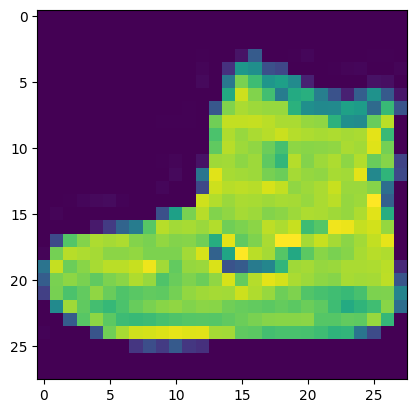

In [ ]:
plt.imshow(X_train[0])

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [ ]:
print(labels.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


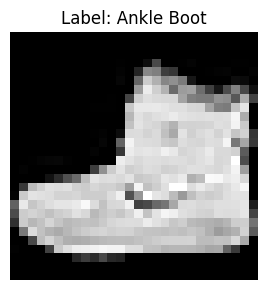

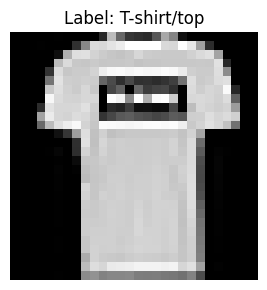

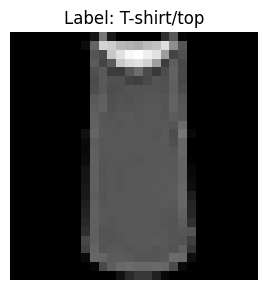

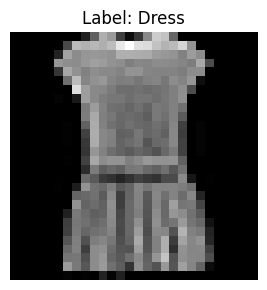

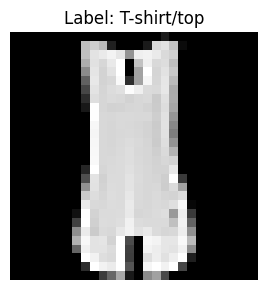

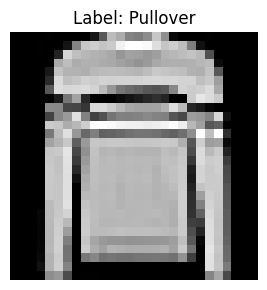

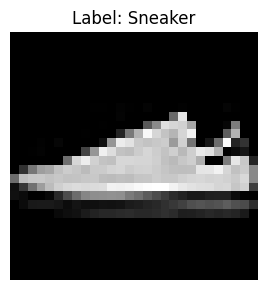

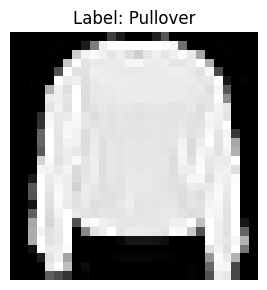

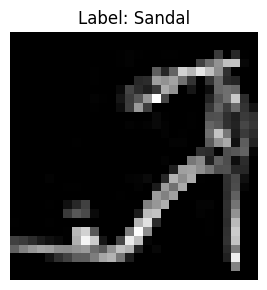

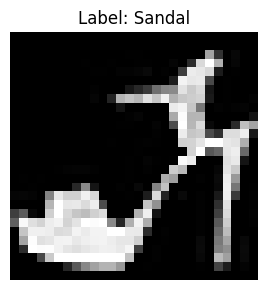

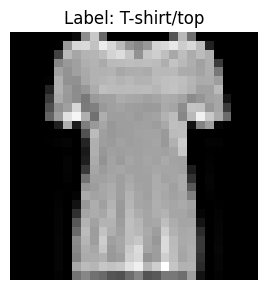

In [ ]:
for i in range(10):
    plt.figure(figsize=(4, 3))
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {labels[y_train[i]]}")  # Map label to class name
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical


**Q2. Normalize the pixel values to the range [0, 1]. Why is normalization critical for CNNs?**

**What it does:** Converts pixel values from integers (0–255) to floats (0.0–1.0).

**Why it’s important:**

Stabilizes training: Prevents large input values from causing unstable gradients during backpropagation.

Faster convergence: Helps optimization algorithms like Adam or SGD perform better.

Keeps inputs in similar scale: Essential when using activation functions like ReLU or sigmoid.

**Q3. Apply one-hot encoding to the labels. Why is this necessary for multi-class classification?**

**Why One-Hot Encode?**

CNNs with softmax output layer expect target labels in one-hot format when using categorical_crossentropy loss.

Converts class indices into a format suitable for categorical_crossentropy.

Needed for multi-class classification where each label should be a vector (not scalar).



In [ ]:
def simple_preprocessing(X, y):
    """Simple preprocessing"""
    # Normalize pixel values to 0-1 range
    X_processed = X.astype('float32') / 255.0

    # Reshape for CNN (add channel dimension)
    X_processed = X_processed.reshape(-1, IMG_ROWS, IMG_COLS, 1)

    # Convert labels to one-hot encoding
    y_processed = to_categorical(y, NUM_CLASSES)

    return X_processed, y_processed

In [ ]:
X_train_processed, y_train_processed = simple_preprocessing(X_train, y_train)
X_test_processed, y_test_processed = simple_preprocessing(X_test, y_test)


print("Processed training data shape:", X_train_processed.shape)
print("Processed training labels shape:", y_train_processed.shape)
print("Processed test data shape:", X_test_processed.shape)
print("Processed test labels shape:", y_test_processed.shape)

Processed training data shape: (60000, 28, 28, 1)
Processed training labels shape: (60000, 10)
Processed test data shape: (10000, 28, 28, 1)
Processed test labels shape: (10000, 10)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
X_training,X_val,y_training,y_val = train_test_split(X_train_processed,y_train_processed, test_size=TEST_SIZE , random_state=RANDOM_STATE)

In [ ]:
print("Fashion MNIST train -  rows:",X_training.shape[0]," columns:", X_training.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test_processed.shape[0]," columns:", X_test_processed.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import numpy as np

print(type(X_training), X_training.shape)
print(type(y_training), y_training.shape)


<class 'numpy.ndarray'> (48000, 28, 28, 1)
<class 'numpy.ndarray'> (48000, 10)


In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_training, y_training,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7256 - loss: 0.7597 - val_accuracy: 0.8706 - val_loss: 0.3575
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8754 - loss: 0.3489 - val_accuracy: 0.8890 - val_loss: 0.3091
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8925 - loss: 0.2921 - val_accuracy: 0.8985 - val_loss: 0.2815
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9057 - loss: 0.2562 - val_accuracy: 0.9056 - val_loss: 0.2664
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9173 - loss: 0.2283 - val_accuracy: 0.9116 - val_loss: 0.2590
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9260 - loss: 0.2012 - val_accuracy: 0.9129 - val_loss: 0.2462
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9349 - loss: 0.1782 - val_accuracy: 0.9123 - val_loss: 0.2531
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9416 - loss: 0.1612 - val_accuracy: 0.

**Q6. Plot the training and validation loss curves. Is there evidence of overfitting? Suggest one
method to mitigate it.**

Yes our model is overfitting and mitigate and control the overfitting we can use **Regularization** or **Dropouts** technique.

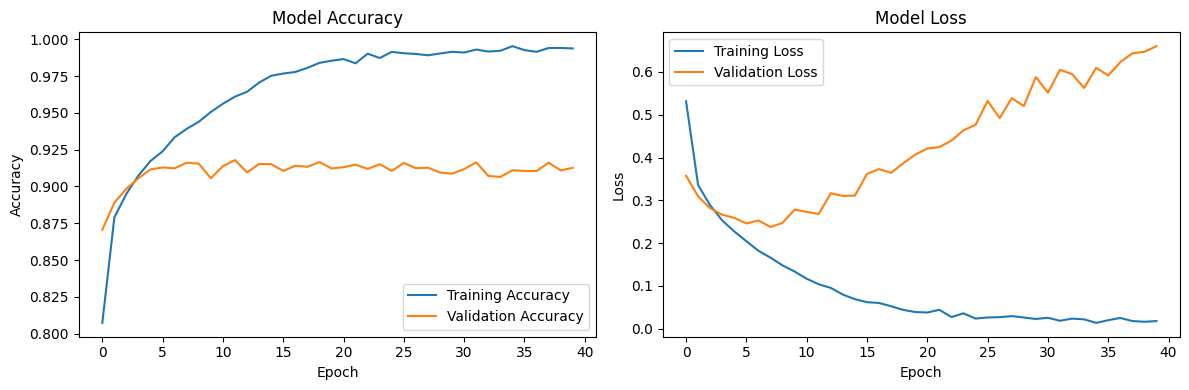

In [ ]:
 # Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
score1 = model.evaluate(X_test_processed, y_test_processed, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 1.0608874559402466
Test accuracy: 0.9099000096321106


**Adding Dropouts for handling Overfitting**

**Q4. Build a CNN with two convolutional layers (128 filters, 3x3 kernel), ReLU activation,
max-pooling, and dense layers. Explain the role of each layer**

Conv2D(32, 3x3): Extracts 32 local features using 3×3 filters. Uses ReLU to introduce non-linearity.

MaxPooling2D(2x2): Reduces spatial dimensions (downsampling) to lower computation and control overfitting.

Dropout(0.25): Randomly deactivates 25% neurons to prevent overfitting.

Conv2D(64, 3x3): Learns more complex features with 64 filters.

MaxPooling2D(2x2): Further downsampling.

Dropout(0.25): Another regularization layer.

Conv2D(128, 3x3): Deeper features extraction.

Dropout(0.4): Stronger regularization at deeper level.

Flatten(): Converts 3D output to 1D vector for dense layers.

Dense(128): Fully connected layer for learning complex representations.

Dropout(0.3): Reduces overfitting before final layer.

Dense(NUM_CLASSES, softmax): Outputs probabilities for each class.

Compiled with:

categorical_crossentropy → for multi-class classification

adam → efficient optimizer

accuracy → for performance tracking

In [ ]:
# Model 2 with dropouts

model2 = Sequential()
# Add convolution 2D
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))

model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(NUM_CLASSES, activation='softmax'))


model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

**Q5. Train the model for 10 epochs with a batch size of 128. Report the final training and test
accuracy**

In [ ]:
history2 = model2.fit(X_training, y_training,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5861 - loss: 1.1216 - val_accuracy: 0.8278 - val_loss: 0.4820
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8069 - loss: 0.5167 - val_accuracy: 0.8583 - val_loss: 0.3906
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8409 - loss: 0.4326 - val_accuracy: 0.8823 - val_loss: 0.3247
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8567 - loss: 0.3873 - val_accuracy: 0.8867 - val_loss: 0.3156
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8729 - loss: 0.3492 - val_accuracy: 0.8931 - val_loss: 0.2918
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8774 - loss: 0.3330 - val_accuracy: 0.9029 - val_loss: 0.2678
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8846 - loss: 0.3148 - val_accuracy: 0.8980 - val_loss: 0.2785
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8871 - loss: 0.3034 - val_accuracy: 0.

**Q6. Plot the training and validation loss curves. Is there evidence of overfitting? Suggest one
method to mitigate it.**

There is no such overfitting after we used Dropouts Technique.

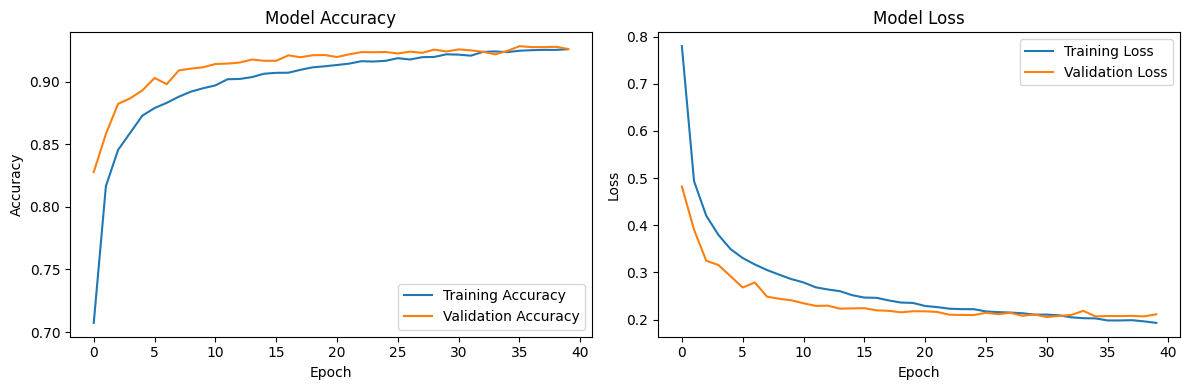

In [ ]:
 # Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
score = model2.evaluate(X_test_processed, y_test_processed, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23878583312034607
Test accuracy: 0.9146000146865845


In [ ]:
import numpy as np

# Predict class probabilities
y_pred_probs = model2.predict(X_test_processed)

# Convert to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_processed, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


**Q7. Generate and interpret the confusion matrix for the test set. Which classes are most commonly confused?**

Our model gets the most confused for Shirt and T-shirt classes. that is because they look kind of same and model it finds it hard to classify between them.

<Figure size 1000x800 with 0 Axes>

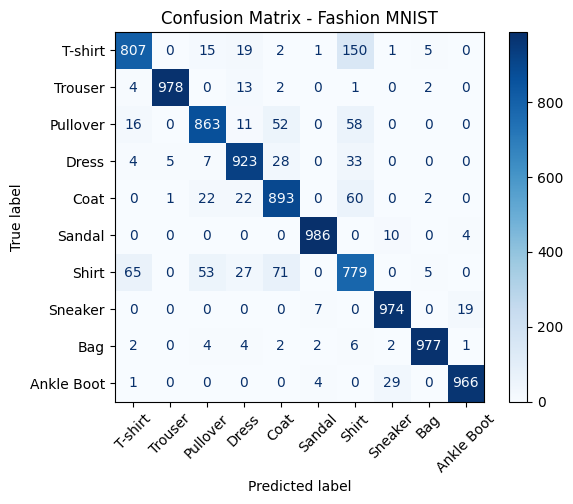

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[
                                  "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
                                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
                              ])
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()


In [ ]:

# Generate report
report = classification_report(
    y_true_classes,              # true labels
    y_pred_classes,              # predicted labels
    target_names=[
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]
)

print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.81      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.86      0.88      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.72      0.78      0.75      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.91      0.92     10000



**Q8. Visualize the first test image and its predicted label. Was the prediction correct?**

Yes the prediction is correct.

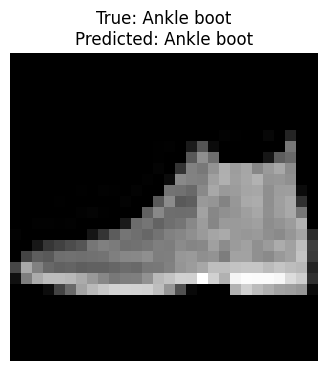

✅ Prediction correct!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Convert one-hot encoded true label to class index
true_index = np.argmax(y_test_processed[0])
true_label = class_names[true_index]

# Predicted class is already an index
pred_index = y_pred_classes[0]
pred_label = class_names[pred_index]

# Plot the first test image
plt.figure(figsize=(4, 4))
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title(f"True: {true_label}\nPredicted: {pred_label}", fontsize=12)
plt.show()

# Print correctness
print("✅ Prediction correct!" if true_label == pred_label else "❌ Prediction incorrect.")


**Save the model weights using pickle. Why is this step important for reproducibility?**

**Pickle is not recommended for saving deep learning models because:**

* It may not correctly serialize complex model components like layers or optimizers.
* It can be insecure when loading data from untrusted sources.
* It often lacks compatibility across different library versions.

Instead, use framework-specific methods like `model.save()` in TensorFlow or `torch.save()` in PyTorch for reliable and safe model saving.


In [ ]:
model2.save_weights("model_weights.weights.h5")
